In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

In [2]:
img_1 = cv2.imread("imagens/px-people.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

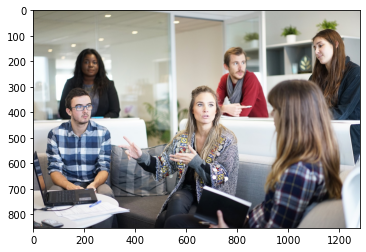

In [3]:
plt.imshow(img_1)

In [4]:
imag = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)

In [5]:
cascade = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default.xml")

face = cascade.detectMultiScale(img_1, 1.3, 5)
len(face)

5

In [6]:
face[0]

array([1089,  103,   99,   99], dtype=int32)

In [9]:
img = img_1.copy()

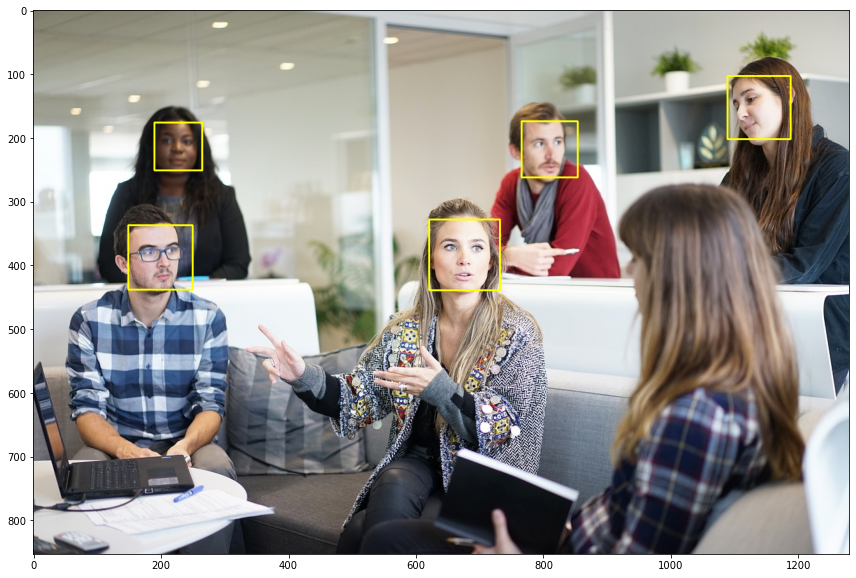

In [8]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img)

**Imagem com face**

In [21]:
imagem = cv2.imread("imagens/px-woman-smilings.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

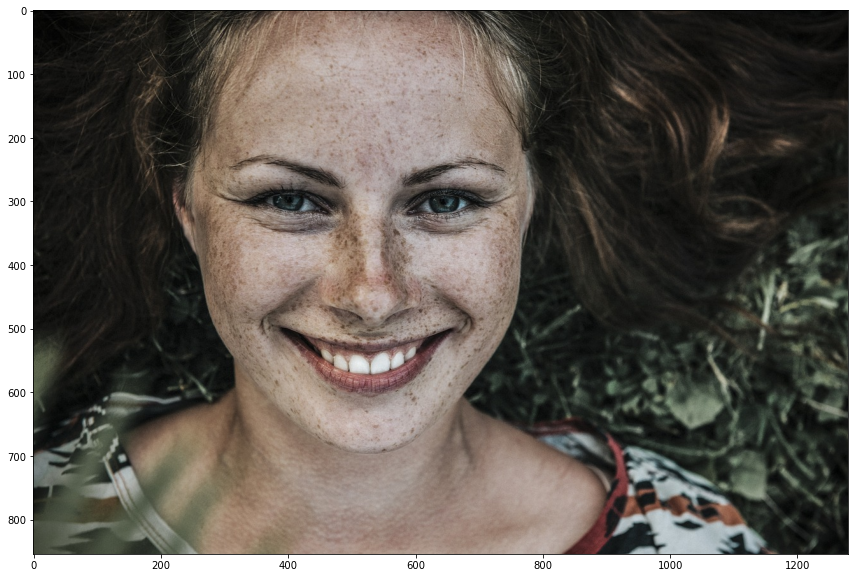

In [22]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem)

In [23]:
classificador_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

Identificado rosto 0


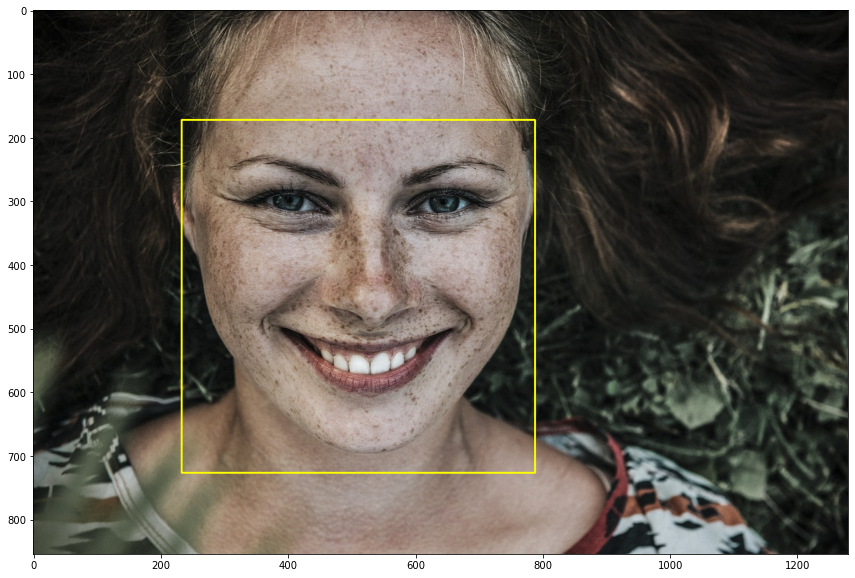

In [20]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return imagem

imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

**Pontos marcos faciais**

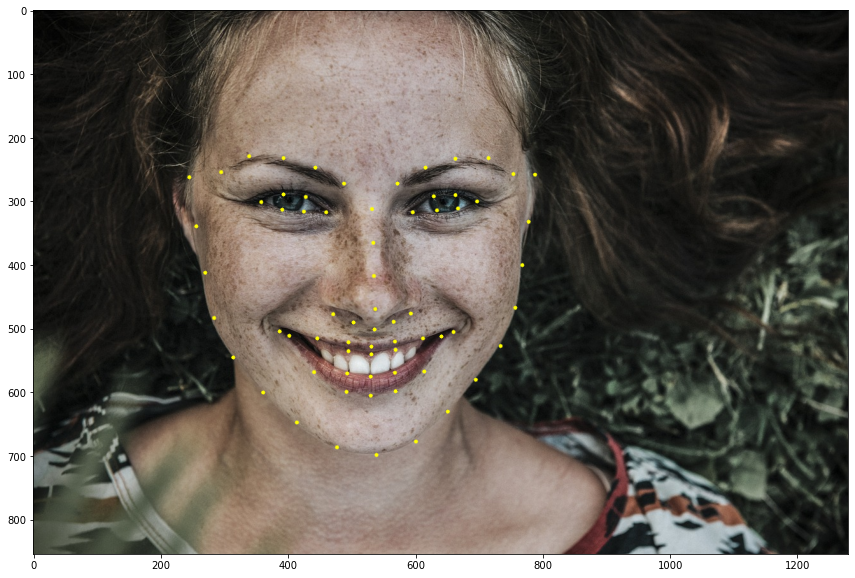

In [32]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos

marcos_faciais = pontos_marcos_faciais(imagem)

def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
                
    return imagem

imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

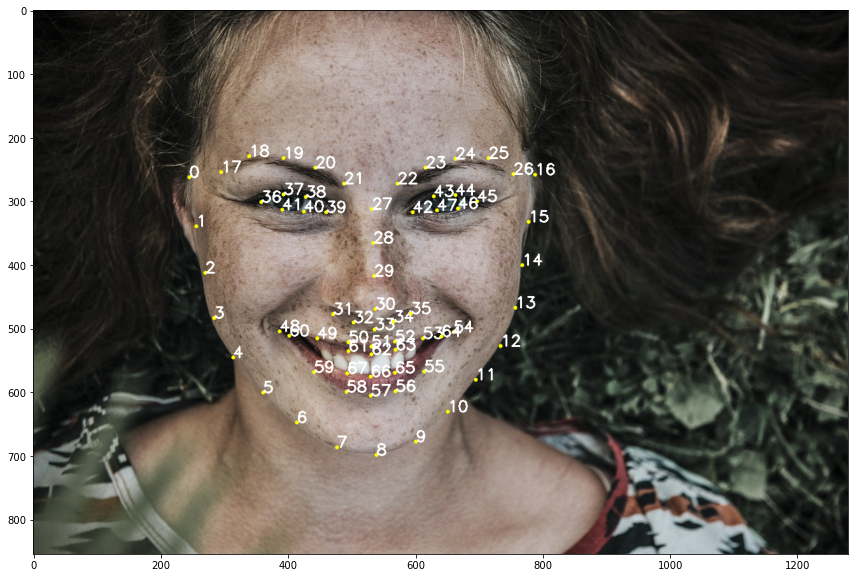

In [33]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos

marcos_faciais = pontos_marcos_faciais(imagem)

def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (255,255,255), 2)
    
    return imagem

imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)